In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE_clean.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1,2012-06-01
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1,2012-06-02
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1,2012-06-03
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1,2012-06-04
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1,2012-06-05


In [4]:
df=df.drop("date",True)

In [5]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035391,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


- FFMC --> large difference between the min value and 25% to max value
- DMC,DC,BUI,rain  --> large difference between the min value -75% and max value

 so there are major  outliers present in these features

In [6]:
def plot_dist(col,df):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))
    ax1 =sns.distplot(df[col],ax=ax1) 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}') 
    ax2 = sns.boxplot(data = df, x=col,ax=ax2);
    ax2.set_title(f'{col}') 
    ax2.set_xlabel(f'{col}')
    plt.figure(figsize=(30, 15))
    plt.show()

- **with respect to FFMC**

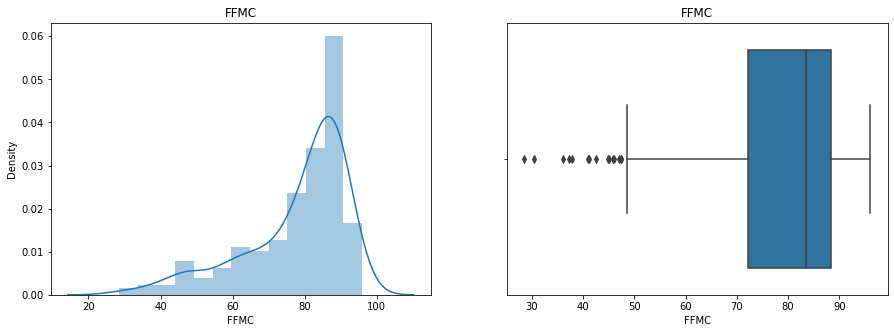

<Figure size 2160x1080 with 0 Axes>

In [7]:
plot_dist("FFMC",df)

In [8]:
#handeling the outliers with respect to FFMC 

In [9]:
# as in FFMC distriution is skewed we are using IQR method

In [10]:
q1=df["FFMC"].quantile(0.25)
q3=df["FFMC"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [11]:
lower_fence,upper_fence

(47.73750000000001, 112.63749999999999)

In [12]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [13]:
lower_extreme,upper_extreme

(23.40000000000002, 136.97499999999997)

In [14]:
df["FFMC"].describe()

count    244.000000
mean      77.887705
std       14.337571
min       28.600000
25%       72.075000
50%       83.500000
75%       88.300000
max       96.000000
Name: FFMC, dtype: float64

In [15]:
# theh upper range is not maching the max value .. we just need to remove outliers from lower side as  FFMC is left skewed

In [16]:
data=df.copy()
# making a copy of the data

In [17]:
data.loc[data["FFMC"]<=lower_fence,"FFMC"]=lower_fence

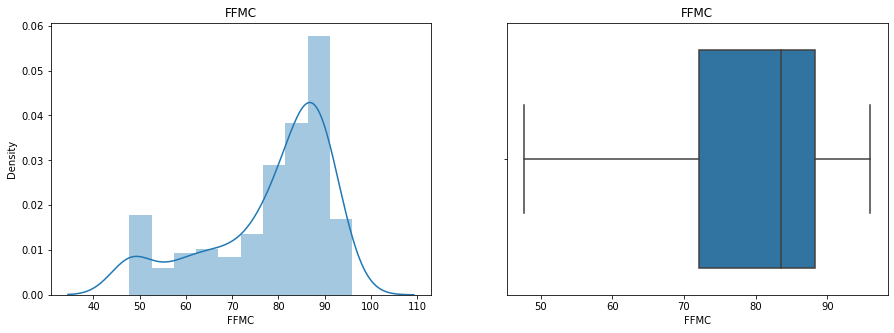

<Figure size 2160x1080 with 0 Axes>

In [18]:
plot_dist("FFMC",data)

- outliers are handeled in FFMC features

- **with respect to DMC**

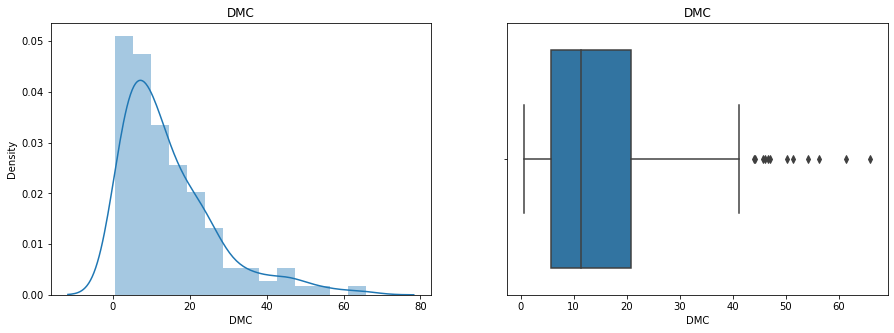

<Figure size 2160x1080 with 0 Axes>

In [19]:
plot_dist("DMC",df)

In [20]:
q1=df["DMC"].quantile(0.25)
q3=df["DMC"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [21]:
lower_fence,upper_fence

(-16.624999999999996, 43.175)

In [22]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [23]:
# extreme outliers
lower_extreme,upper_extreme

(-39.05, 65.6)

In [24]:
df["DMC"].describe()

count    244.000000
mean      14.673361
std       12.368039
min        0.700000
25%        5.800000
50%       11.300000
75%       20.750000
max       65.900000
Name: DMC, dtype: float64

In [25]:
data.loc[data["DMC"]>=upper_fence,"DMC"]=upper_fence

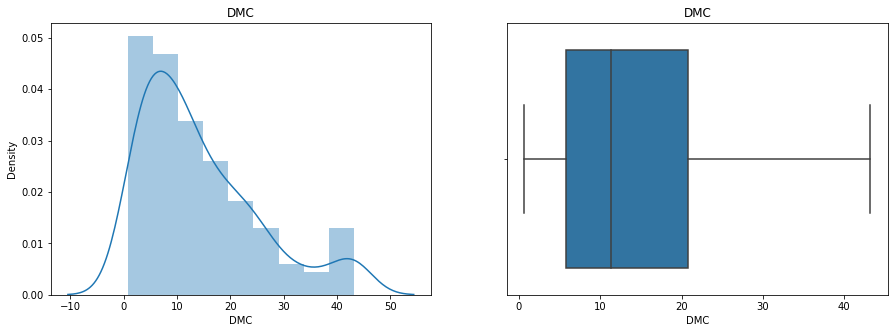

<Figure size 2160x1080 with 0 Axes>

In [26]:
plot_dist("DMC",data)

- **with respect to DC**

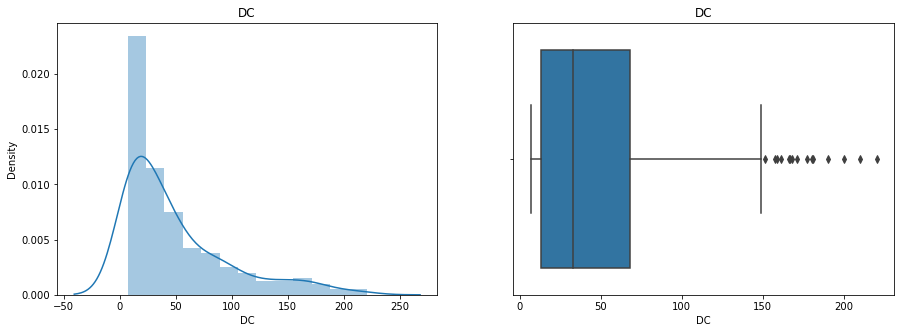

<Figure size 2160x1080 with 0 Axes>

In [27]:
plot_dist("DC",df)

In [28]:
q1=df["DC"].quantile(0.25)
q3=df["DC"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [29]:
lower_fence,upper_fence

(-69.03750000000002, 150.46250000000003)

In [30]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [31]:
# extreme values 
lower_extreme,upper_extreme

(-151.35000000000002, 232.77500000000003)

In [32]:
df["DC"].describe()

count    244.000000
mean      49.288484
std       47.619393
min        6.900000
25%       13.275000
50%       33.100000
75%       68.150000
max      220.400000
Name: DC, dtype: float64

In [33]:
data.loc[data["DC"]>=upper_fence,"DC"]=upper_fence

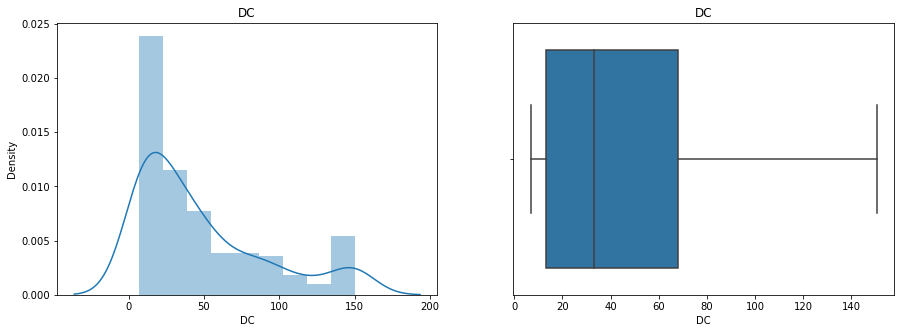

<Figure size 2160x1080 with 0 Axes>

In [34]:
plot_dist("DC",data)

- **with respect to BUI**

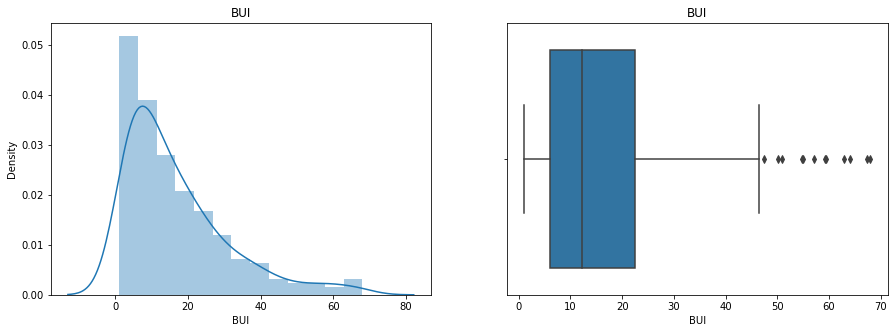

<Figure size 2160x1080 with 0 Axes>

In [35]:
plot_dist("BUI",df)

In [36]:
q1=df["BUI"].quantile(0.25)
q3=df["BUI"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [37]:
lower_fence,upper_fence

(-18.787499999999998, 47.3125)

In [38]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [39]:
# extreme values 
lower_extreme,upper_extreme

(-43.574999999999996, 72.1)

In [40]:
df["BUI"].describe()

count    244.000000
mean      16.664754
std       14.204824
min        1.100000
25%        6.000000
50%       12.250000
75%       22.525000
max       68.000000
Name: BUI, dtype: float64

In [41]:
data.loc[data["BUI"]>=upper_fence,"BUI"]=upper_fence

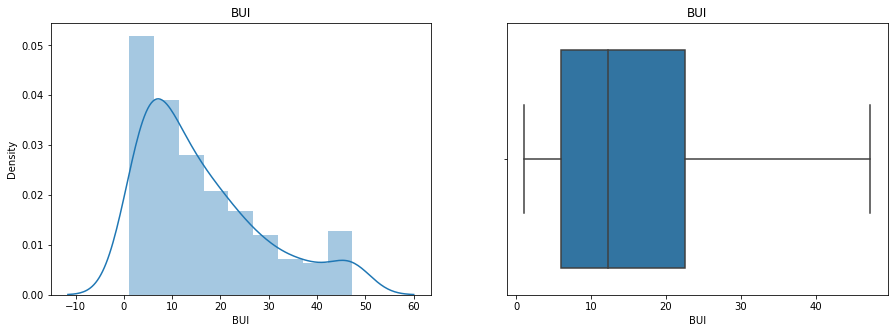

<Figure size 2160x1080 with 0 Axes>

In [42]:
plot_dist("BUI",data)

- **with respect to Rain**

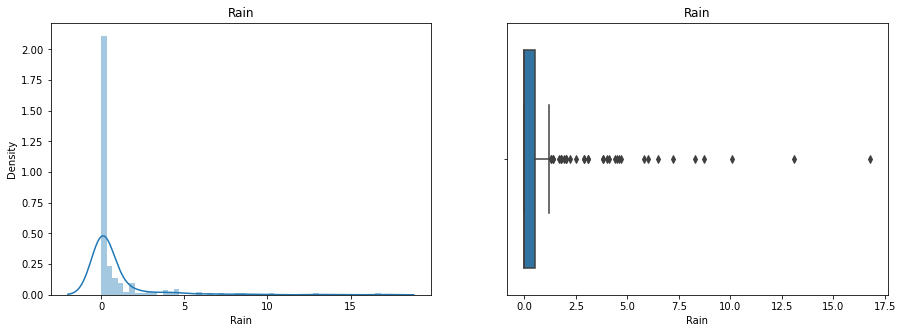

<Figure size 2160x1080 with 0 Axes>

In [43]:
plot_dist("Rain",df)

In [44]:
q1=df["Rain"].quantile(0.25)
q3=df["Rain"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [45]:
lower_fence,upper_fence

(-0.75, 1.25)

In [46]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [47]:
# extreme values 
lower_extreme,upper_extreme

(-1.5, 2.0)

In [48]:
df["Rain"].describe()

count    244.000000
mean       0.760656
std        1.999406
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max       16.800000
Name: Rain, dtype: float64

In [49]:
data.loc[data["Rain"]>=upper_extreme,"Rain"]=upper_extreme

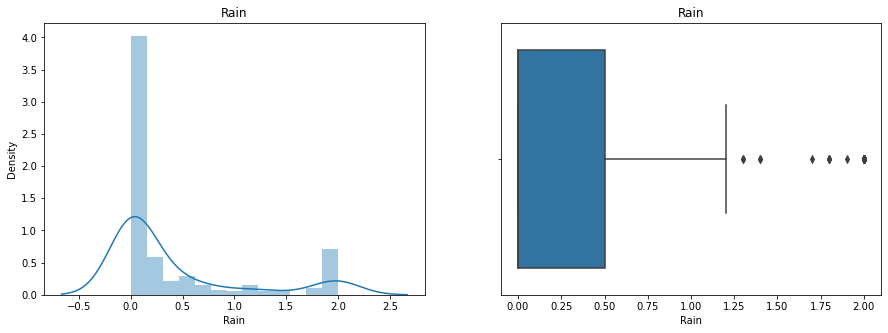

<Figure size 2160x1080 with 0 Axes>

In [50]:
plot_dist("Rain",data)

- **handling null values**

In [51]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        1
Region         0
dtype: int64

# using data without handeling outliers

#### spliting the data before performing any operation

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit

##### spliting the data based on the region

In [53]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df["Region"]):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]

In [54]:
strat_train_set["Region"].value_counts()

1    98
0    97
Name: Region, dtype: int64

In [55]:
strat_test_set["Region"].value_counts()

0    25
1    24
Name: Region, dtype: int64

In [56]:
x_train=strat_train_set.drop("Temperature",axis=1)

In [57]:
y_train=strat_train_set["Temperature"]

In [58]:
x_test=strat_test_set.drop("Temperature",axis=1)

In [59]:
y_test=strat_test_set["Temperature"]

### handeling null values in FWI (continious) and  in Region (discrete)

In [60]:
# for FWI   we are using median  to handel the null values
# for Region  we are filling the null values with the mode
median_FWI=x_train["FWI"].median()
mode_classes=str(x_train["Classes"].mode().values[0])

In [61]:
median_FWI,mode_classes

(4.45, 'fire')

In [62]:
x_train["FWI"].fillna(median_FWI,inplace=True)
x_train["Classes"].fillna(mode_classes,inplace=True)

In [63]:
x_test["FWI"].fillna(median_FWI,inplace=True)
x_test["Classes"].fillna(mode_classes,inplace=True)

### encoding the categorical data

##### with respect to classes we are dealing with nominal data with two categories .. so we are going to use one hot encoding

In [64]:
x_train.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
115,24,9,2012,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,not fire,1
207,25,8,2012,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,fire,0
28,29,6,2012,47,13,0.3,79.9,18.4,84.4,2.2,23.8,3.9,not fire,1
134,13,6,2012,52,15,2.0,72.3,11.4,7.8,1.4,10.9,0.9,not fire,0
20,21,6,2012,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,fire,1


In [65]:
x_train["Classes"]=pd.get_dummies(x_train["Classes"],drop_first=True)
x_test["Classes"]=pd.get_dummies(x_test["Classes"],drop_first=True)

In [66]:
x_train.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
115,24,9,2012,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,1,1
207,25,8,2012,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,0,0
28,29,6,2012,47,13,0.3,79.9,18.4,84.4,2.2,23.8,3.9,1,1
134,13,6,2012,52,15,2.0,72.3,11.4,7.8,1.4,10.9,0.9,1,0
20,21,6,2012,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,0,1


### Feature selection

##### Drop Constant Features Using Variance Threshold

In [67]:
### It will remove  zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x_train) # you ave to do fit on x_train

VarianceThreshold(threshold=0)

In [68]:
var_thres.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [69]:
sum(var_thres.get_support())

13

In [70]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[var_thres.get_support()]]

print(len(constant_columns))

1


In [71]:
for column in constant_columns:
    print(column)

year


In [72]:
x_train=x_train.drop(constant_columns,axis=1)

In [73]:
x_test=x_test.drop(constant_columns,axis=1)

In [74]:
x_train.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
115,24,9,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,1,1
207,25,8,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,0,0
28,29,6,47,13,0.3,79.9,18.4,84.4,2.2,23.8,3.9,1,1
134,13,6,52,15,2.0,72.3,11.4,7.8,1.4,10.9,0.9,1,0
20,21,6,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,0,1


In [75]:
x_test.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,2,6,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,1,0
136,15,6,90,15,0.0,66.8,7.2,14.7,1.2,7.1,0.6,1,0
43,14,7,61,13,0.6,73.9,7.8,22.9,1.4,8.4,0.8,1,1
225,12,9,72,14,0.0,84.2,8.3,25.2,3.8,9.1,3.9,0,0
173,22,7,48,18,0.0,91.5,44.2,90.1,13.2,44.0,25.4,0,0


##### pearson correlation

In [76]:
# if two  features are highly correlated ( not w.r.t target i m saying ) .then we can drop one of the feature as it is doing the same thing , for that we specify some threshold value

In [77]:
# taking a threshold value --> given by domain expert
# the time being we are taking threshold =0.95

In [78]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [79]:
# giving threshold 60 percent for the time 
threshold=0.95

In [80]:
correlation(x_train.iloc[:,:-1],threshold)

{'BUI'}

In [81]:
# so we are going to drop it

In [82]:
x_train=x_train.drop('BUI',axis=1)
x_test=x_test.drop('BUI',axis=1)

##### information gain

In [83]:
# from sklearn.feature_selection import mutual_info_classif # for classification
from sklearn.feature_selection import mutual_info_regression # for regression problem


In [84]:
mutual_info=mutual_info_regression(x_train,y_train)

In [85]:
mutual_data=pd.Series(mutual_info,index=x_train.columns)

In [86]:
mutual_data.sort_values(ascending=False)

ISI        0.469878
FFMC       0.379314
FWI        0.305238
RH         0.237493
DC         0.228607
DMC        0.221400
month      0.215241
Classes    0.202557
Ws         0.148975
Region     0.131616
Rain       0.093796
day        0.000000
dtype: float64

In [87]:
# we do feature  selection w.r.t our training data only then remove from train and test.. to avoid overfitting

##### feature Importance

In [88]:
# This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [89]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier()

In [90]:
print(model.feature_importances_)

[0.10920915 0.07086668 0.10806854 0.08747271 0.07370821 0.10112285
 0.09663355 0.09999222 0.10262378 0.09177071 0.0166258  0.04190579]


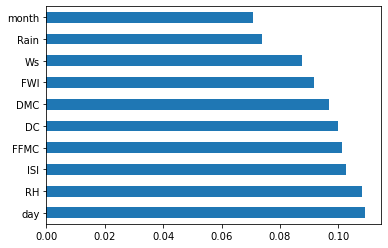

In [91]:
ranked_features=pd.Series(model.feature_importances_,index=x_train.columns)
ranked_features.nlargest(10).plot(kind="barh")
plt.show()

In [92]:
# these are the important features for our model so we are sticking to them 

In [93]:
x_train.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes,Region
115,24,9,65,19,0.6,68.3,5.5,15.2,1.5,0.7,1,1
207,25,8,40,18,0.0,92.1,56.3,157.5,14.3,31.1,0,0
28,29,6,47,13,0.3,79.9,18.4,84.4,2.2,3.9,1,1
134,13,6,52,15,2.0,72.3,11.4,7.8,1.4,0.9,1,0
20,21,6,78,14,0.0,81.0,6.3,31.6,2.6,2.2,0,1


In [94]:
y_train.head()

115    29
207    34
28     32
134    30
20     30
Name: Temperature, dtype: int64

In [95]:
x_test.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes,Region
123,2,6,73,13,4.0,55.7,2.7,7.8,0.6,0.2,1,0
136,15,6,90,15,0.0,66.8,7.2,14.7,1.2,0.6,1,0
43,14,7,61,13,0.6,73.9,7.8,22.9,1.4,0.8,1,1
225,12,9,72,14,0.0,84.2,8.3,25.2,3.8,3.9,0,0
173,22,7,48,18,0.0,91.5,44.2,90.1,13.2,25.4,0,0


In [96]:
y_test.head()

123    30
136    28
43     34
225    31
173    32
Name: Temperature, dtype: int64

## Temp vs independent feature

- ***Plot data and a linear regression model fit.***

In [97]:
continues_features=[feature for feature in x_train.columns if len(x_train[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['day', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI']


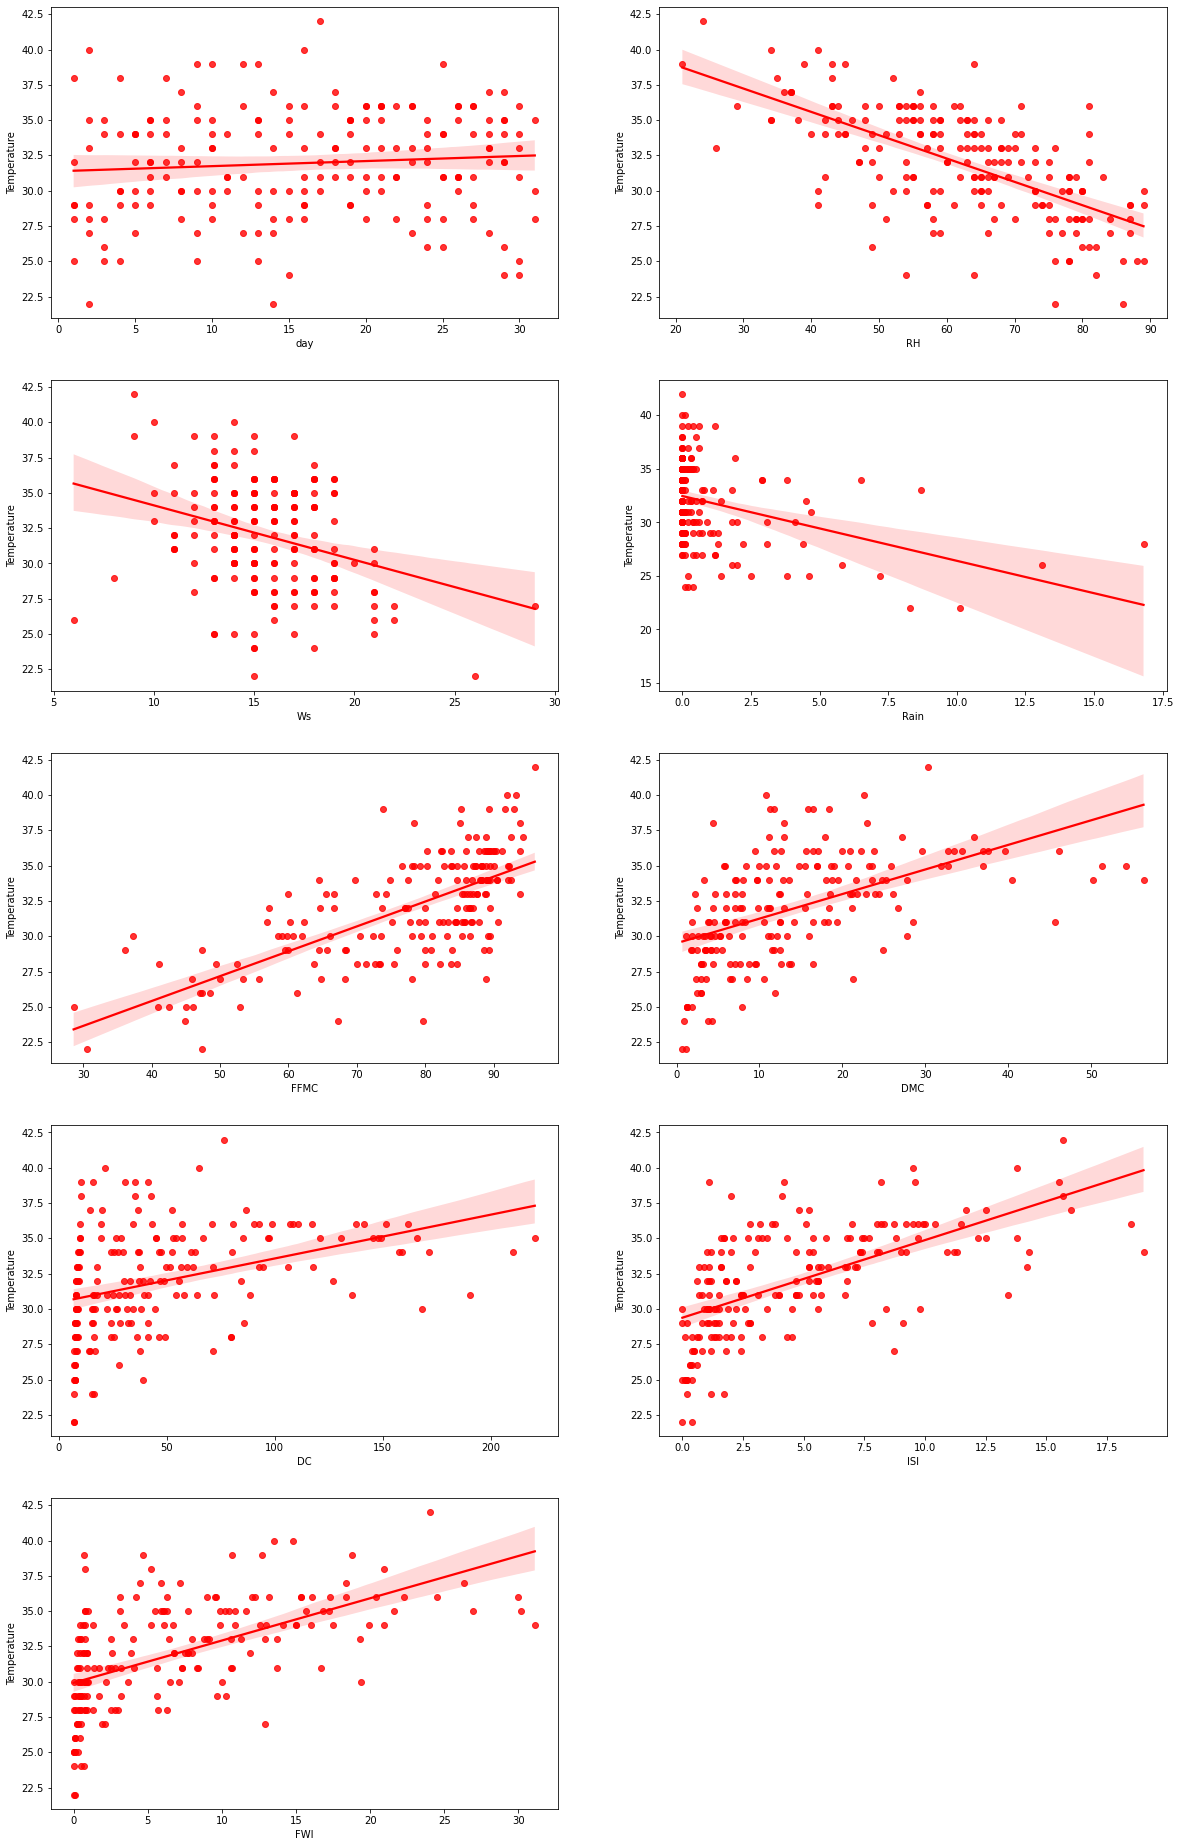

In [98]:
count=1
plt.subplots(figsize=(20, 40))
for col in continues_features:
    plt.subplot(6,2,count)
    sns.regplot(data=x_train,x=col,y=y_train,color="red")
    count+=1

plt.show()

In [99]:
# temp and days are not much correlated we are going to drop days

In [100]:
x_train=x_train.drop("day",axis=1)
x_test=x_test.drop("day",axis=1)

## standardize the datasets

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.

z=(x-x_mean)/std

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
s_x_train=scaler.fit_transform(x_train)
s_x_test=scaler.transform(x_test)

## model Training

In [103]:
# this is multiple linear regression Problem
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
# training the training data
regression.fit(s_x_train,y_train)

LinearRegression()

In [104]:
# print the cofficient and the intercept
print(regression.coef_)
# toal cofficient = number of features 

[-0.49726211 -1.00833708 -0.67408725  0.1409791   1.18328407  0.37270028
  0.1365454   0.30372259 -0.05421019 -0.25081479 -0.10958313]


In [105]:
print(regression.intercept_)
# intercept =1

31.953846153846154


In [108]:
# prediction for test data
x_pred=regression.predict(s_x_test)

In [109]:
x_pred

array([30.03671682, 29.25466187, 31.69278669, 31.50421046, 35.60792931,
       35.95373174, 28.6013468 , 30.3431151 , 33.53971223, 25.34846088,
       36.36168486, 30.04427946, 30.67521461, 34.2230339 , 35.25812544,
       34.13112443, 31.27824522, 32.77268698, 32.84798657, 34.63339978,
       31.05013171, 33.88003823, 33.64381377, 36.65329388, 32.22261862,
       32.76688889, 32.20435537, 27.99653661, 28.48159971, 34.77023464,
       34.5346089 , 28.7203994 , 32.22303211, 32.97001955, 27.57614995,
       32.22896666, 31.18859924, 33.72444047, 31.00792237, 35.13323177,
       33.4207606 , 30.17178049, 33.27235858, 33.02626633, 34.03725836,
       35.94244268, 32.37180824, 37.17574649, 35.85941562])

Text(0, 0.5, 'Test pred data')

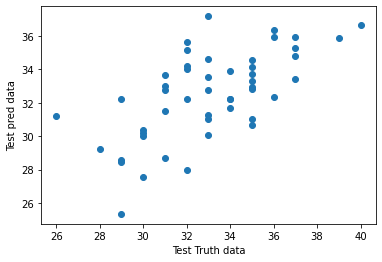

In [110]:
plt.scatter(y_test,x_pred)
plt.xlabel("Test Truth data")
plt.ylabel("Test pred data")

- w.r.t your truth point and predicted point if you are getting some linear replationship then your model is good

In [111]:
# residuals
residuals=y_test-x_pred

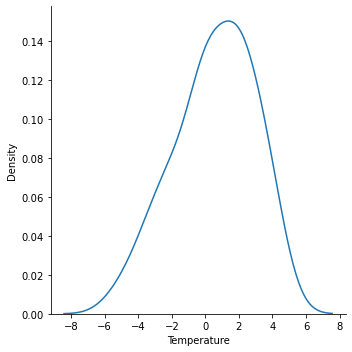

In [112]:
sns.displot(residuals,kind="kde")

- the residual (error) should follows a normal/gaussian distribution

In [113]:

# scatter plot with prediction and residual
#uniform distributiion

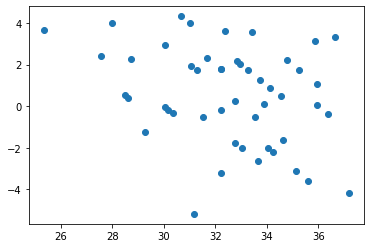

In [114]:
plt.scatter(x_pred,residuals)

## performance matrix

In [115]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error",mean_absolute_error(y_test,x_pred))
print("(mean_squared_error",mean_squared_error(y_test,x_pred))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,x_pred)))

mean_absolute_error 1.9752423448340848
(mean_squared_error 5.697176470385509
root mean squared error 2.3868758808085326


## r squared and adjusted R squared

In [116]:
# r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,x_pred)
print(score)

0.322288906787772


In [118]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.12080723042737995